In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치        
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
hospital= pd.read_csv('test.csv')

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   REQDATA  54 non-null     object
 1   CNT      54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes


In [5]:
train=hospital[(hospital['REQDATA']>='2021-06-01')&(hospital['REQDATA']<='2021-06-30')]
test=hospital[(hospital['REQDATA']>='2021-07-01')&(hospital['REQDATA']<='2021-07-31')]

In [6]:
from fbprophet import Prophet

In [7]:
train.columns=['ds','y']
test.columns=['ds','y']

In [20]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


In [21]:
future_data = prophet.make_future_dataframe(periods = 27, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(27)

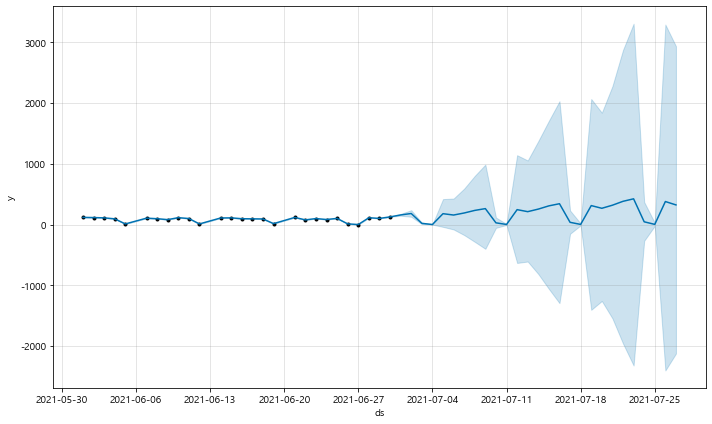

In [22]:
fig1=prophet.plot(forecast_data)

In [13]:
pred_y=a.yhat.values[0:27]
test_y=test.y.values[0:27]

In [19]:
a

,ds,yhat,yhat_lower,yhat_upper
27,2021-07-01,158.877983,143.405241,170.446582
28,2021-07-02,182.652671,125.395285,232.755202
29,2021-07-03,20.525516,8.787839,31.995991
30,2021-07-04,1.644996,0.148369,3.160524
31,2021-07-05,179.735423,-52.108803,399.786347
32,2021-07-06,157.552203,-106.772024,397.518702
33,2021-07-07,191.174865,-190.215216,549.677771
34,2021-07-08,233.755966,-308.918551,758.825727
35,2021-07-09,263.305342,-447.239753,953.846986
36,2021-07-10,29.051033,-58.217420,115.008402


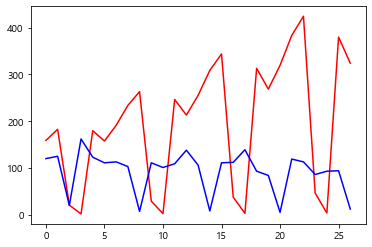

In [16]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [17]:
test_y

array([120, 125,  20, 162, 123, 111, 113, 103,   7, 111, 101, 109, 138,
       106,   8, 111, 112, 139,  93,  84,   5, 119, 113,  86,  93,  94,
        12], dtype=int64)

In [18]:
test

,ds,y
27,2021-07-01,120
28,2021-07-02,125
29,2021-07-03,20
30,2021-07-05,162
31,2021-07-06,123
32,2021-07-07,111
33,2021-07-08,113
34,2021-07-09,103
35,2021-07-10,7
36,2021-07-12,111
